<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### K-Nearest Neighbor Classifier With RobustScaler

This Code template illustrates the Classification problem solving using KNeighborsClassifier and feature rescaling technique RobustScaler in a pipeline from sci-kit learn.

### **Required Packages**

In [9]:
import warnings
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### **Initialization**
Filepath of CSV file

In [10]:
file_path= ""

List of features which are required for model training .

In [11]:
features = []

Target feature for prediction.

In [12]:
target = ''

### **Dataset Overview**
Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [13]:
df=pd.read_csv(file_path)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


### **Dataset Information**
Print a concise summary of a DataFrame.

We will use info() method to print the information about the DataFrame including the index dtype and columns, non-null values and memory usage.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


### **Dataset Describe**
Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

We will analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

In [15]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


### **Feature Selection**
It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [16]:
X=df[features]
Y=df[target]

### **Data Preprocessing**
Since we do not know what is the number of Null values in each column.So,we print the columns arranged in descreasnig orde 

In [17]:
print(df.isnull().sum().sort_values(ascending=False))

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [18]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [19]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,1,1
1,0,14.0,5.4,0,1,0
2,0,11.8,6.3,1,1,1
3,0,14.4,6.1,0,1,1
4,1,13.5,5.9,0,0,0


#### **Correlation Map**
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

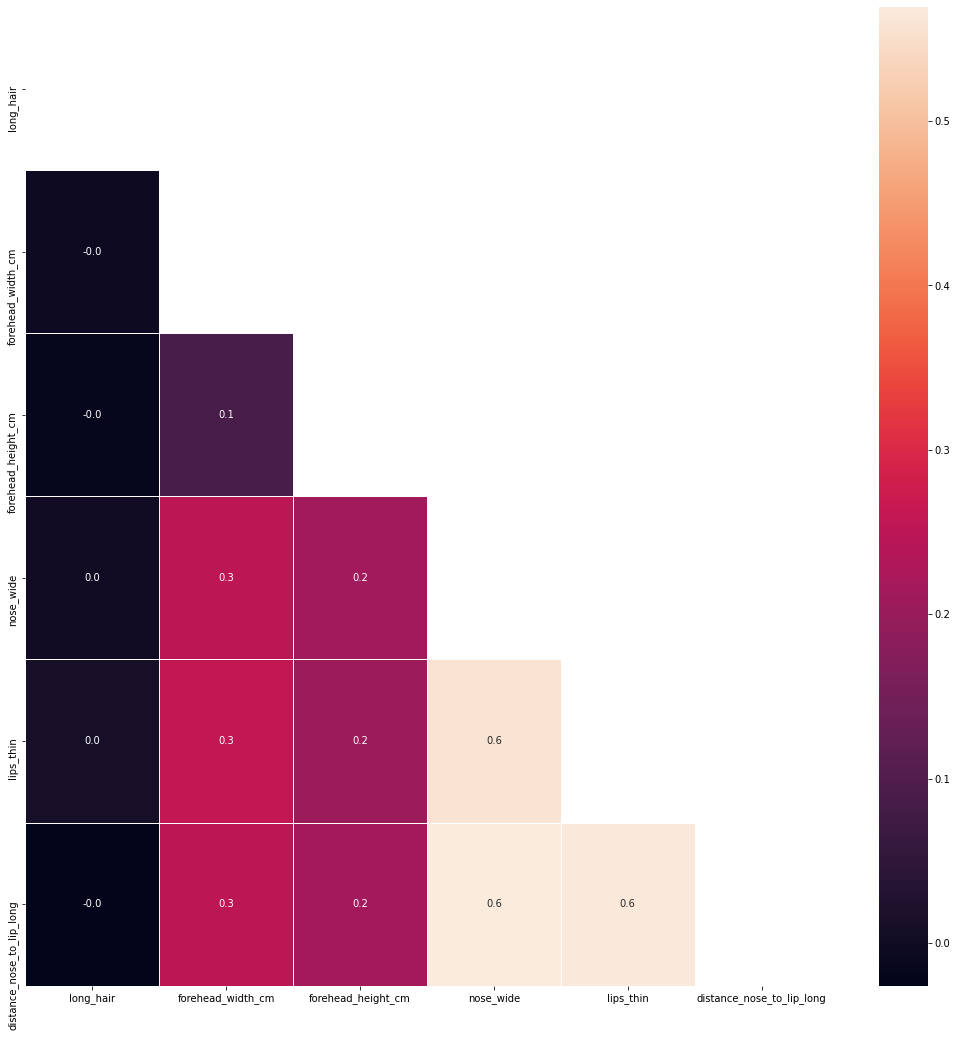

In [20]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### **Distribution of Target Variable**

<AxesSubplot:xlabel='gender', ylabel='count'>

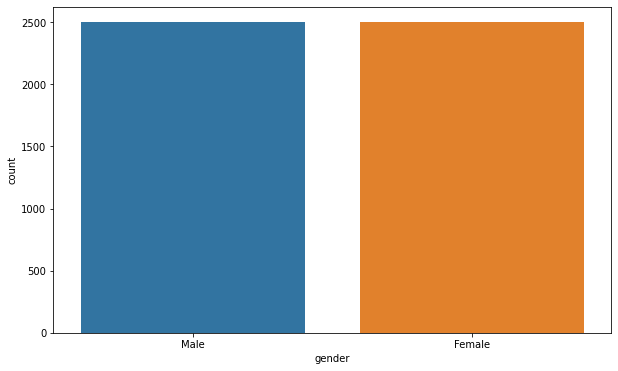

In [21]:
plt.figure(figsize = (10,6))
se.countplot(Y)

## **Data Splitting**
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=78)

#### **Handling Target Imbalance**
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [23]:
x_train,y_train = RandomOverSampler(random_state=78).fit_resample(x_train, y_train)

### **Model**
KNN is one of the easiest Machine Learning algorithms based on Supervised Machine Learning technique. The algorithm stores all the available data and classifies a new data point based on the similarity. It assumes the similarity between the new data and data and put the new case into the category that is most similar to the available categories.KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the available data.

**Model Tuning Parameters**
> * **n_neighbors** -> Number of neighbors to use by default for kneighbors queries.
> * **weights** -> weight function used in prediction. {uniform,distance}
> * **algorithm**-> Algorithm used to compute the nearest neighbors. {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
> * **p** -> Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
> * **leaf_size** -> Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

### **RobustScaler**
As Standardization of a dataset is a common requirement for many machine learning estimators,we will use Robust Scaler for that purpose.
It scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [24]:
model=make_pipeline(RobustScaler(),KNeighborsClassifier(n_jobs=-1))
model.fit(x_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))])

#### **Model Accuracy**
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [25]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 96.00 %



#### **Confusion Matrix**
A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

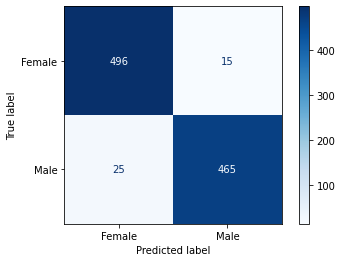

In [26]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### **Classification Report**
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
> * Precision:- Accuracy of positive predictions.
> * Recall:- Fraction of positives that were correctly identified.
> * f1-score:- percent of positive predictions were correct
> * support:- Support is the number of actual occurrences of the class in the specified dataset.


In [27]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

      Female       0.95      0.97      0.96       511
        Male       0.97      0.95      0.96       490

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



##### Creator:Prateek Kumar ,Github [Profile](https://github.com/pdpandey26)